## B-Scan Simulation result and plot for Steel Sheet Using Onscale

#### Experimental Setup:
The experimental setup is as shown below:
<img src="metal_sheet.PNG" alt="Drawing" style="width: 400px;"/>



The parameters used are as per the tutorial in [link](https://support.onscale.com/hc/en-us/articles/360022005111-Simulating-Wave-Propagation-in-a-Steel-Plate-with-a-Defect)

As can be seen from the tutorial time domain signal is obtained at X=20mm and Y=0mm but for this work X has been chosen to be X=40.5mm(end of the plate) and Y varying from 0 to 22.5 mm.

Note 1:  *  Here X is the horizontal axis and Y is the vertical axis

Note 2:  *  The Y position of receiver has been changed in increments of  0.2mm

Importing libraries for data set up and plotting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as ml
import os

### Selecting files from folder,writing it to a file and removing unwanted files manually

Note: * Uncomment the lines if list file needs to be rewritten


In [2]:
directory='/home/kushal/Desktop/Simulation/b_scan_simulation/steel_plate_onscale/'
subdir_tuple=os.walk(directory)
subdir_list=[x[0] for x in subdir_tuple]
selected_list=[]
for i in range(0,226,2):
    for subdir in subdir_list:
        if subdir.find('wave_prop'+str(i)+'-')>=0 and subdir.find('/1')>=0:
            selected_list.append(subdir)
print(len(selected_list))

#with open('selected_directories.txt','w') as f:
#    for selected_dir in selected_list:
#        f.write("%s\n" % selected_dir)

116


### Loading selected files:

In [3]:
final_list=[]
with open('selected_directories.txt','r') as f:
    for line in f:
        final_list.append(line.rstrip())

## Loading data and creating dataframe

In [4]:
num_a_scans=len(final_list)
dictionary_scans={}
for i,subdir in zip(range(0,226,2),final_list):
    temp_df=pd.read_csv(subdir+'/pos'+str(i)+'.csv',header=None)
    if i==0:
        dictionary_scans['time_stamp']=temp_df.iloc[:,0]
        dictionary_scans['pos0']=temp_df.iloc[:,1]
    else:
        dictionary_scans['pos'+str(i)]=temp_df.iloc[:,1]

data=pd.DataFrame.from_dict(dictionary_scans)
data

,time_stamp,pos0,pos2,pos4,pos6,pos8,pos10,pos12,pos14,pos16,...,pos206,pos208,pos210,pos212,pos214,pos216,pos218,pos220,pos222,pos224
0,5.327882e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.065576e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.598365e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.131153e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2.663941e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,3.196729e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,3.729517e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,4.262306e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,4.795094e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,5.327882e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Preparing data for plot with region of interest selected between 100 and 500(first reflection of ultrasound waves)

In [5]:
b_scan=(np.array(data.iloc[:,1:114].values)).T
b_scan=b_scan[:,100:500]
#b_scan=b_scan[:,500:900]
b_scan=np.flipud(b_scan)

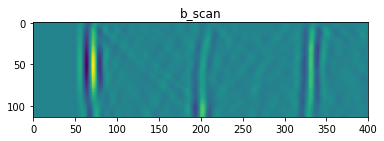

In [6]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_title('b_scan')
plt.imshow(b_scan)
plt.show()